![header](../figures/logos_partenaires._cmems_se.jpg)

# Evaluate CER method on SWOT tracks

<div style="text-align: right"><i> 2023-01-19 evaluation_onswot_CERmethod </i></div>

***
**Authors:**  Datlas, IGE, IMT-Atlantique & CLS <br>
**Copyright:** 2022 Datlas, IGE, IMT-Atlantique & CLS <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h1><center>Evaluate CER method calibration on SWOT tracks </center></h1></div>

In [1]:
import os
import glob
import sys
sys.path.append('..')
from src.benchmark import *
from src.plot import *
from src.swot import *

<div class="alert alert-info" role="alert">

<h2>1. Input files to analyse</h2>

</div>

## Data challenge inputs

In [2]:
# Check if inputs have already been downloaded otherwise do
if len(os.listdir('../inputs'))<2:
    # Get pseuso-observation
    print('Downloading and unzipping inputs')
    !wget https://ige-meom-opendap.univ-grenoble-alpes.fr/thredds/fileServer/meomopendap/extract/ocean-data-challenges/2022c_SWOT_error_calibration_GS/dc_SWOTcalibGS_inputs.tar.gz
    !tar -xvf dc_SWOTcalibGS_inputs.tar.gz dc_SWOTcalibGS_inputs    
    !mv dc_SWOTcalibGS_inputs  ../inputs/    
    !rm dc_SWOTcalibGS_inputs.tar.gz
     

In [3]:
 list_of_file_inputs = sorted(glob.glob('../inputs/dc_SWOTcalibGS_inputs/dc_SWOTcalibGS_input_pass*.nc')) 

## Filtered outputs to evaluate

In [4]:
list_of_file = sorted(glob.glob('../results/calib_CERmethod/dc_SWOTcalibGS_input_pass*.nc'))

<div class="alert alert-info" role="alert">

<h2>2. Illustration on one pass (same as quickstart example)</h2>

</div>

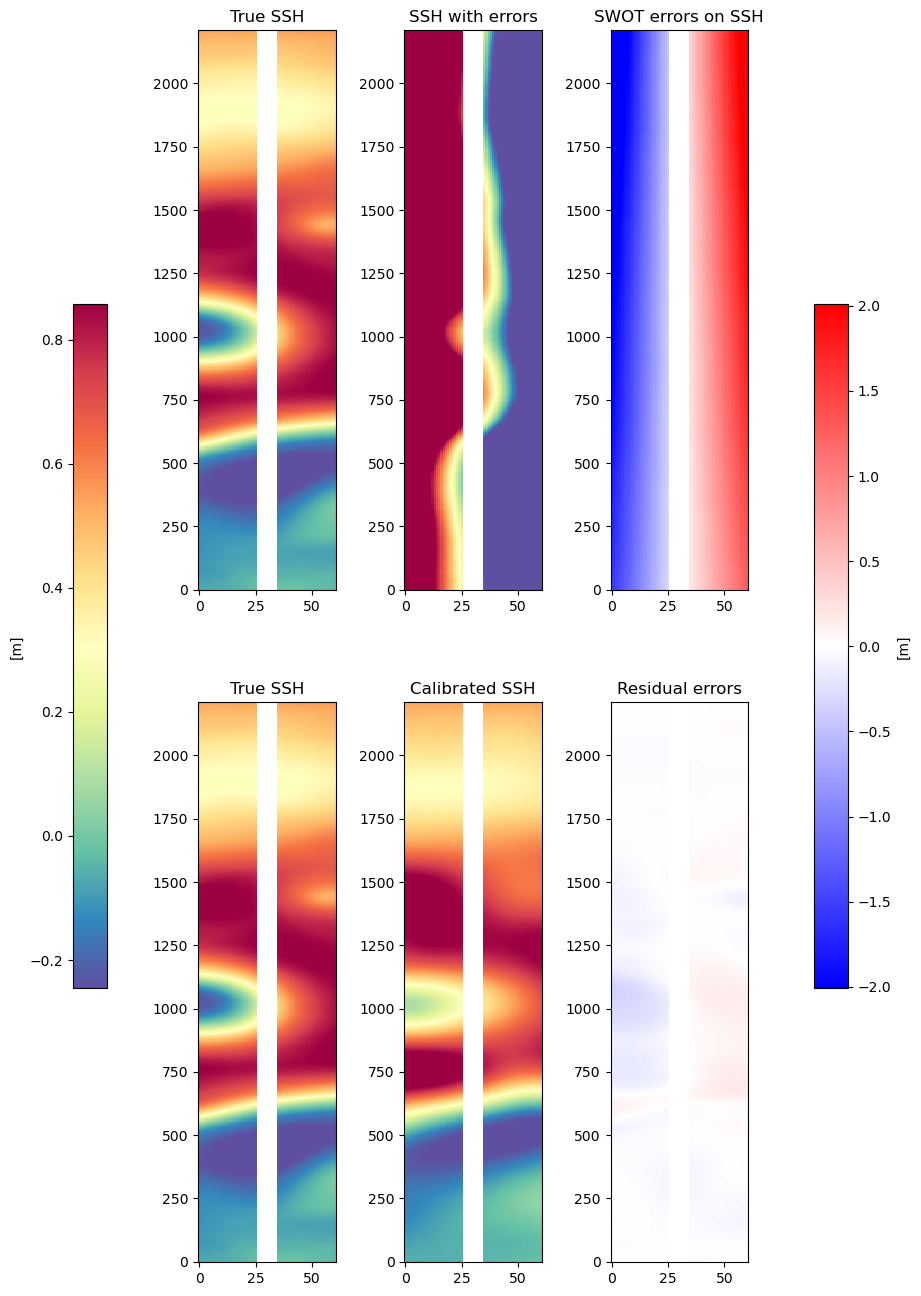

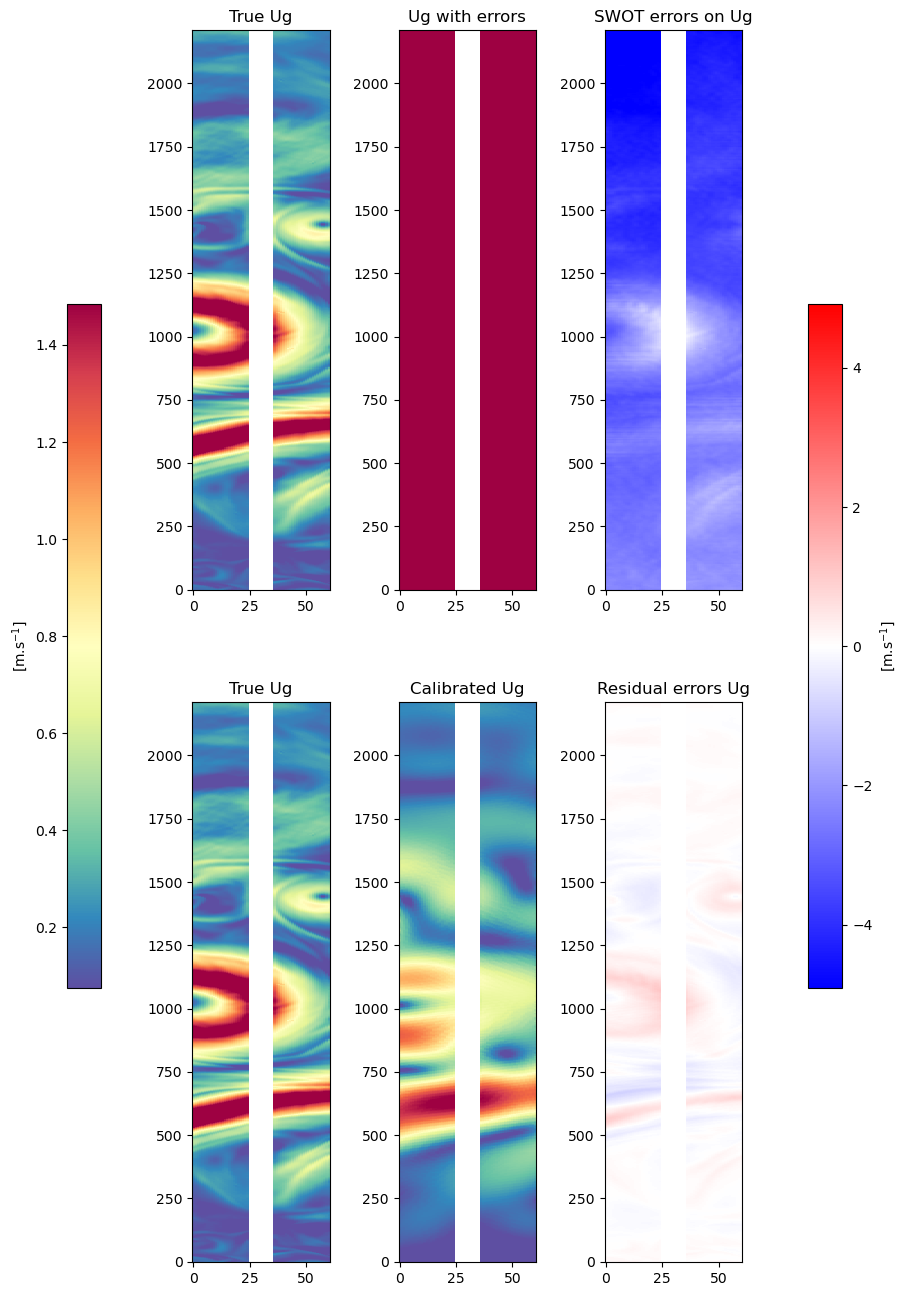

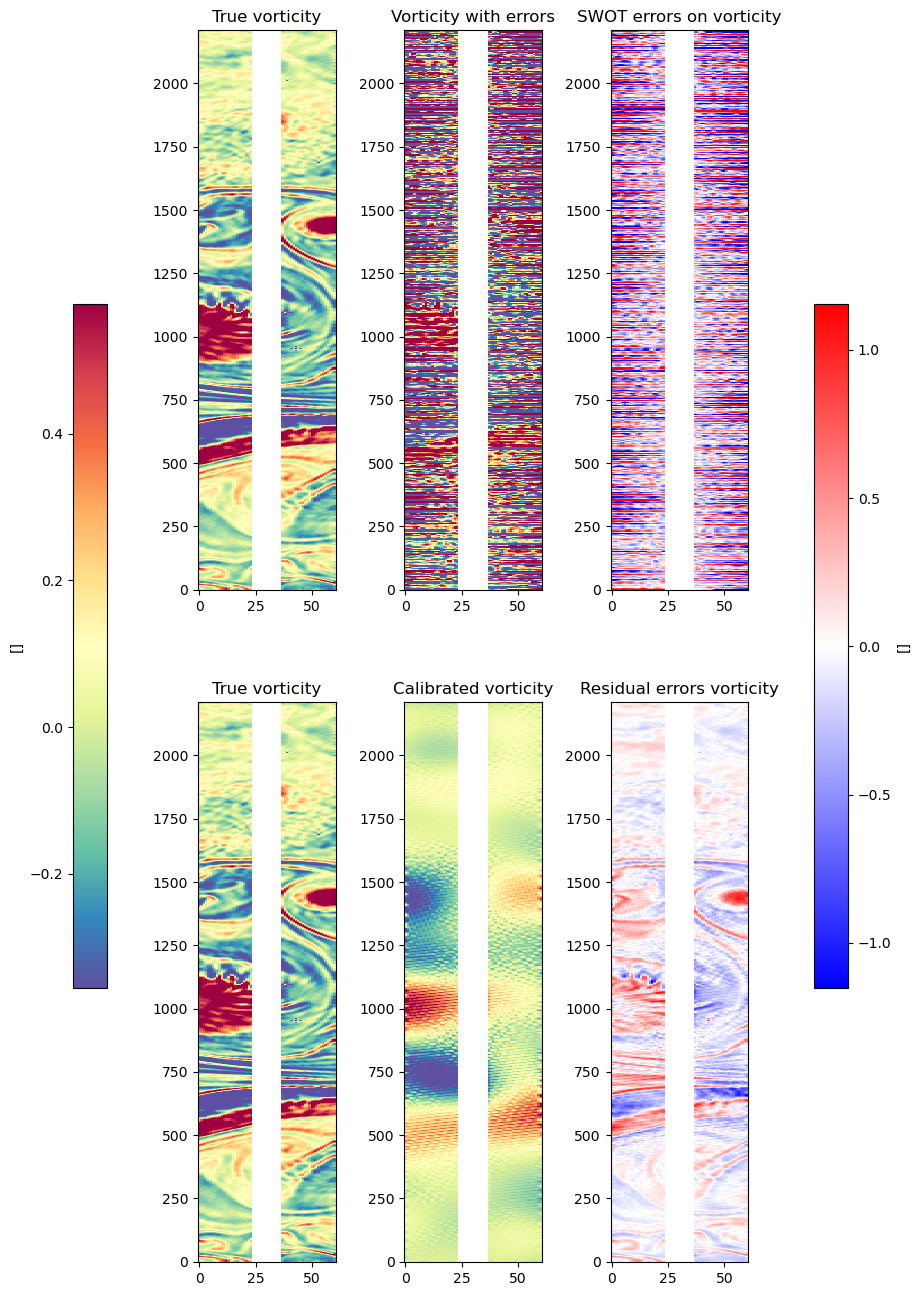

In [5]:
plot_demo_pass(list_of_file_inputs[0], list_of_file[0])

In [6]:
swt_input = SwotTrack(list_of_file[0])
np.sqrt(np.mean((swt_input._dset.ssh_true-swt_input._dset.ssh_err_calib)**2))

<xarray.DataArray ()>
array(0.08115174)

<div class="alert alert-info" role="alert">

<h2>3. Statistical & Spectral Analysis </h2>

</div>

## 3.1 Parameters

In [7]:
etuvar = 'ssh_err_calib'
calib_name = 'CERmethod'
output_dir = '../results/calib_CERmethod'
stat_output_filename = f'{output_dir}/stat_CERmethod.nc'
stat_by_regime_output_filename = f'{output_dir}/stat_by_regime_CERmethod.nc'
psd_output_filename = f'{output_dir}/psd_CERmethod.nc'
baseline_bench = Benchmark()

## 3.2 Compute grid boxes statistics

SSH: <xarray.DataArray 'ssh_rmse' ()>
array(0.06152395)
Ug: <xarray.DataArray 'ug_rmse' ()>
array(0.18342681)
Ksi: <xarray.DataArray 'ksi_rmse' ()>
array(0.23577491)


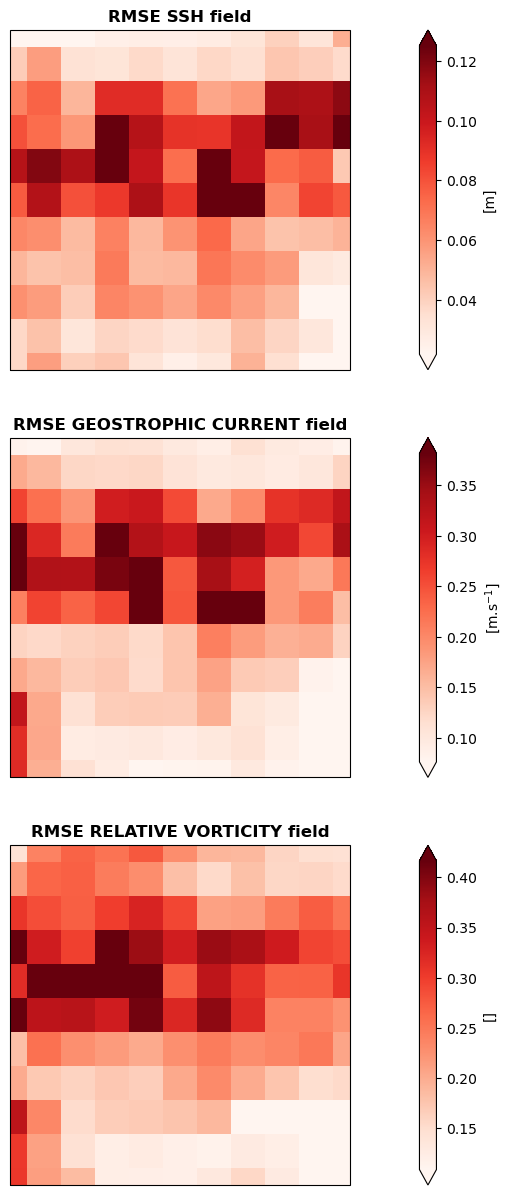

CPU times: user 6 s, sys: 235 ms, total: 6.23 s
Wall time: 5.47 s


In [8]:
%%time
# Compute gridded stats
baseline_bench.compute_stats(list_of_file, etuvar, list_of_file_inputs)

# Write gridded stats 
baseline_bench.write_stats(stat_output_filename, calib=calib_name)

# Plot gridded stats
baseline_bench.display_stats(stat_output_filename, xlim=(-65, -55), ylim=(33, 43))

## 3.4 Compute Spectral scores

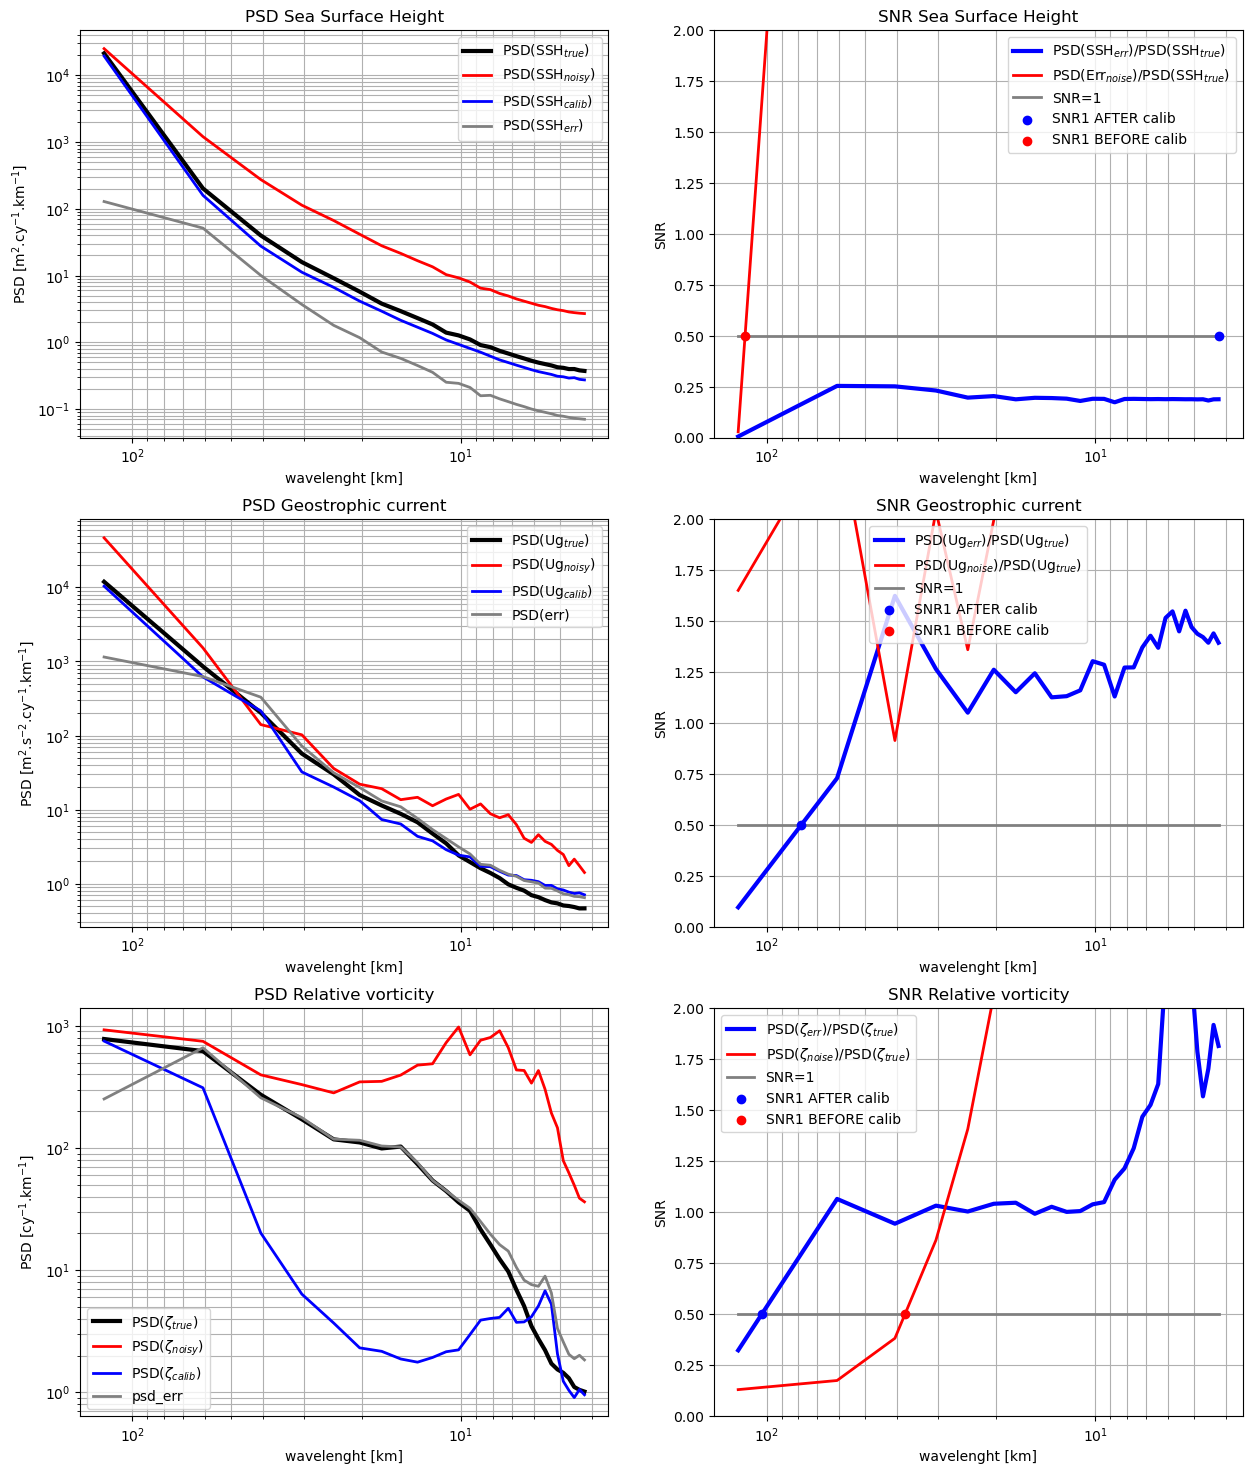

CPU times: user 5.19 s, sys: 479 ms, total: 5.67 s
Wall time: 4.71 s


In [9]:
%%time
# Compute PSD scores
baseline_bench.compute_along_track_psd(list_of_file, etuvar,list_of_file_inputs, lengh_scale=400,overlay=0,psd_type='powerspec')

# Write PSD scores
baseline_bench.write_along_track_psd(psd_output_filename, calib=calib_name,psd_type='powerspec')

# Plot PSD scores
baseline_bench.display_psd(psd_output_filename)

<div class="alert alert-info" role="alert">

<h2>4. Leaderboard </h2>

</div>

In [10]:
baseline_bench.summary('generate_CERmethod_calibration.ipynb')

Summary of the leaderboard metrics:
|    | Method   | Field                          |   µ(RMSE) |   λ(SNR1) [km] | Reference   |
|---:|:---------|:-------------------------------|----------:|---------------:|:------------|
|  0 | no calib | SSH [m]                        |  3.3952   |          116.3 |             |
|  1 | no calib | Geostrophic current [m.s$^-1$] |  9.43752  |          nan   |             |
|  2 | no calib | Relative vorticity []          |  0.759946 |           37.9 |             |
|    | Method    | Field                          |   µ(RMSE) |   λ(SNR1) [km] | Reference                            |
|---:|:----------|:-------------------------------|----------:|---------------:|:-------------------------------------|
|  0 | CERmethod | SSH [m]                        | 0.0741071 |            4.2 | generate_CERmethod_calibration.ipynb |
|  1 | CERmethod | Geostrophic current [m.s$^-1$] | 0.219306  |           78.4 | generate_CERmethod_calibration.ipynb |
|  2 | CERmeth